 # Rabi Class

In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Rabi():
    """
    Description: Class definition for Rabi oscailltion object
    """
    def __init__(self, rabiFreq0=1e6, detuneFreq=0, t_arr=np.linspace(0,1,101)*1e-6):
        self.rabiFreq0 = rabiFreq0   # Rabi frequency with no detuning in Hz
        self.detuneFreq = detuneFreq  # detuning frequency in Hz
        self.t_arr = t_arr   # time array for Rabi oscillation in sec
       
    def rabiOscillation(self):
        """
        Create Rabi oscillation amplitude as a function of time.
        """
        amp = self.rabiFreq0 / (np.sqrt(self.rabiFreq0**2+self.detuneFreq**2))  # check this!!!
        rabiFreq = np.sqrt(self.rabiFreq0**2 + self.detuneFreq**2)
        
        return np.sin(rabiFreq * self.t_arr)**2 * amp

# Rabi 1D vs detune

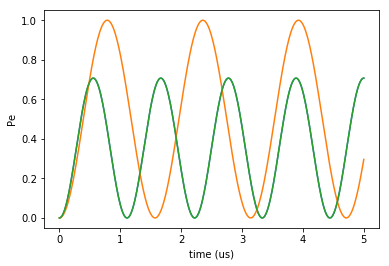

In [103]:
rabiFreq0 = 2e6 # Rabi frequency with no detuning in Hz
t_arr = np.linspace(0,5,501)*1e-6    # define time axis for Rabi oscillation
detune_arr = np.linspace(-2,2,3)*1e6  # detuning in Hz

rabiObj =Rabi(rabiFreq0=rabiFreq0, t_arr=t_arr)

for detune in detune_arr:
    rabiObj.detuneFreq = detune
    plt.plot(rabiObj.t_arr/1e-6, rabiObj.rabiOscillation())

plt.xlabel('time (us)')
plt.ylabel('Pe')

# Rabi Chevron

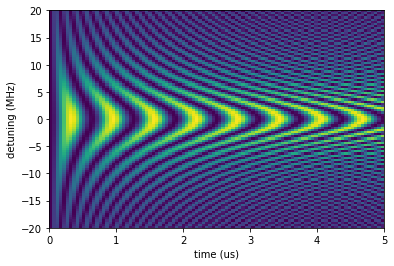

In [98]:
rabiFreq0 = 3.295e6 # Rabi frequency with no detuning in Hz
t_arr = np.linspace(0,2,101)*1e-6    # define time axis for Rabi oscillation
detune_arr = np.linspace(-20,20,101)*1e6  # detuning in Hz

rabiObj =Rabi(rabiFreq0=rabiFreq0, t_arr=t_arr)

data = np.zeros((detune_arr.size, t_arr.size))

for idx, val in enumerate(detune_arr):
    rabiObj.detuneFreq = val
    data[idx,:] = rabiObj.rabiOscillation()
    
plt.imshow(data, aspect='auto', extent=[0, t_arr[-1]/1e-6, detune_arr[0]/1e6, detune_arr[-1]/1e6])
plt.xlabel('time (us)')
plt.ylabel('detuning (MHz)')

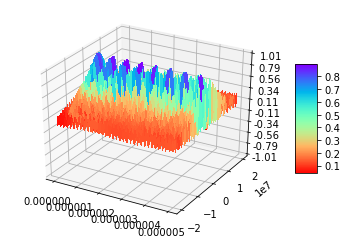

In [99]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
#X = np.arange(-5, 5, 0.25)
#Y = np.arange(-5, 5, 0.25)
X = t_arr
Y = detune_arr
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
Z = data

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow_r,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [77]:
import matplotlib
matplotlib.colors?